In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('cuisines.csv')
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


In [4]:
df.isnull().sum().sum()

0

In [5]:
df.cuisine.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

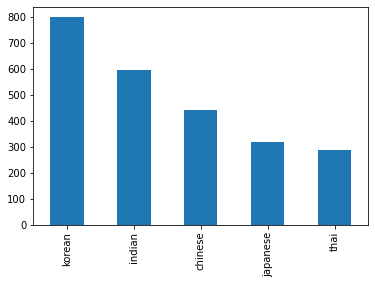

In [6]:
df.cuisine.value_counts().plot.bar()
plt.show()

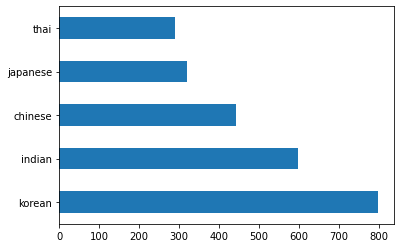

In [7]:
df.cuisine.value_counts().plot.barh()
plt.show()

In [8]:
set(df.cuisine.values)

{'chinese', 'indian', 'japanese', 'korean', 'thai'}

In [9]:
df.cuisine.value_counts()

korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64

In [10]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


In [11]:
thai_df

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
274,2333,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
275,2334,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
276,2335,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277,2336,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
278,2337,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2358,55615,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2359,55616,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2360,55617,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2361,55618,thai,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
ingredients = list(thai_df.columns.values)[2:]

In [13]:
def create_ingredient_df(df):
    ingredients_df = pd.DataFrame()
    for col in ingredients:
        ingredients_df[col] = [df[col].sum()]
    return ingredients_df.T.sort_values(by=0, ascending=False)

/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


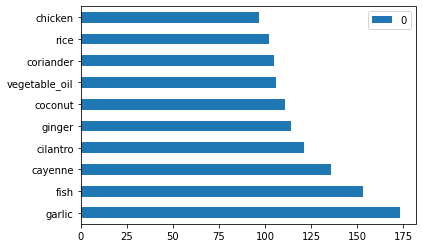

In [14]:
create_ingredient_df(thai_df).head(10).plot.barh()
plt.show()

/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


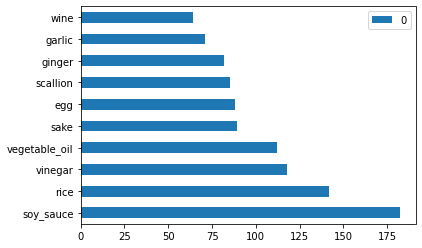

In [15]:
create_ingredient_df(japanese_df).head(10).plot.barh()
plt.show()

/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


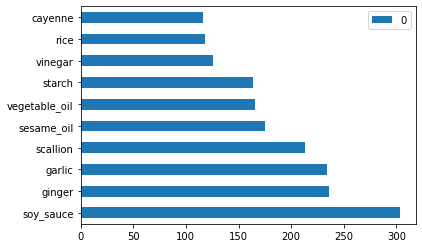

In [16]:
create_ingredient_df(chinese_df).head(10).plot.barh()
plt.show()

/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


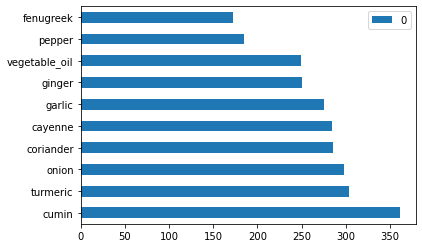

In [17]:
create_ingredient_df(indian_df).head(10).plot.barh()
plt.show()

/Users/zihaophys/miniconda3/envs/zihao/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


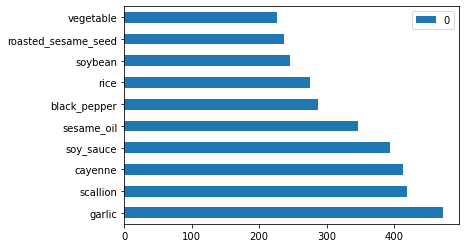

In [18]:
create_ingredient_df(korean_df).head(10).plot.barh()
plt.show()

In [19]:
for col in ingredients:
    if df[col].mean() == 0.0:
        df = df.drop([col], axis=1)

In [20]:
df.describe()

,Unnamed: 0,almond,anise,anise_seed,apple,apricot,artemisia,asparagus,avocado,bacon,...,wheat,wheat_bread,white_bread,white_wine,whole_grain_wheat_flour,wine,yam,yeast,yogurt,zucchini
count,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,...,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000
mean,16040.551471,0.018382,0.000408,0.002859,0.013889,0.005310,0.002451,0.006944,0.006127,0.007353,...,0.147467,0.000408,0.000817,0.020833,0.004085,0.067810,0.001634,0.015523,0.059232,0.008578
std,13625.719887,0.134357,0.020211,0.053408,0.117054,0.072694,0.049457,0.083060,0.078054,0.085451,...,0.354644,0.020211,0.028577,0.142855,0.063796,0.251472,0.040398,0.123645,0.236107,0.092241
min,65.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10907.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15263.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16926.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,57690.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
df = df.drop(['Unnamed: 0'], axis=1)

In [27]:
df.describe()

,almond,anise,anise_seed,apple,apricot,artemisia,asparagus,avocado,bacon,banana,...,wheat,wheat_bread,white_bread,white_wine,whole_grain_wheat_flour,wine,yam,yeast,yogurt,zucchini
count,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,...,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000,2448.000000
mean,0.018382,0.000408,0.002859,0.013889,0.005310,0.002451,0.006944,0.006127,0.007353,0.006127,...,0.147467,0.000408,0.000817,0.020833,0.004085,0.067810,0.001634,0.015523,0.059232,0.008578
std,0.134357,0.020211,0.053408,0.117054,0.072694,0.049457,0.083060,0.078054,0.085451,0.078054,...,0.354644,0.020211,0.028577,0.142855,0.063796,0.251472,0.040398,0.123645,0.236107,0.092241
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
for col in list(df.columns.values)[1:]:
    if df[col].mean() >= 0.39:
        print(col)

cayenne
garlic
soy_sauce


In [78]:
feature_df= df.drop(['cuisine','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine
feature_df.head()

,almond,anise,anise_seed,apple,apricot,artemisia,asparagus,avocado,bacon,banana,...,wheat,wheat_bread,white_bread,white_wine,whole_grain_wheat_flour,wine,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [79]:
labels_df

0         indian
1         indian
2         indian
3         indian
4         indian
          ...   
2443    japanese
2444    japanese
2445    japanese
2446    japanese
2447    japanese
Name: cuisine, Length: 2448, dtype: object

In [80]:
oversample = SMOTE()

In [81]:
transformed_feature_df, trandformed_label_df = oversample.fit_resample(feature_df, labels_df)

In [88]:
trandformed_label_df.value_counts()

indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64

In [89]:
transformed_df = pd.concat([trandformed_label_df, transformed_feature_df], axis=1)

In [90]:
transformed_df.head()

,cuisine,almond,anise,anise_seed,apple,apricot,artemisia,asparagus,avocado,bacon,...,wheat,wheat_bread,white_bread,white_wine,whole_grain_wheat_flour,wine,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [91]:
transformed_df.to_csv('cleaned_cuisines.csv')